In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_dir = "../shapley/results/gsea_results"

libraries = [
    "MSigDB_Hallmark_2020",
    "Reactome_2016",
    "GO_Biological_Process_2021"
]

In [3]:
def load_biomining_results(lib: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"biomining_GSEA_{lib}.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_bio_results = pd.concat([load_biomining_results(lib) for lib in libraries], ignore_index=True)

In [2]:
def load_transynergy_results(lib: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"transynergy_GSEA_{lib}.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_tran_results = pd.concat([load_transynergy_results(lib) for lib in libraries], ignore_index=True)

In [4]:
def summarize_top_pathways(df, paper, top_n=5):
    for lib in libraries:
        subset = df[(df.Library == lib)]
        if subset.empty:
            continue
        if paper == "Biomining":
            print(f"\nTop {top_n} enriched pathways for {paper} {lib}:")
        else:
            print(f"\nTop {top_n} enriched pathways for {paper} {lib}:")
        display(subset.sort_values("NES", ascending=False).head(top_n)[
            ["Term", "NES", "NOM p-val", "FDR q-val", "Lead_genes"]
        ])

summarize_top_pathways(all_bio_results, "Biomining")
summarize_top_pathways(all_tran_results, "Transynergy")


Top 5 enriched pathways for Biomining MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Pperoxisome,1.490009,0.026588,0.256881,TOP2A;NR1I2
1,G2-M Checkpoint,1.459822,0.031397,0.159633,TOP2A;ABL1
2,Mitotic Spindle,1.434712,0.065997,0.138226,TOP2A;ABL1
3,Estrogen Response Late,1.360246,0.061224,0.178593,TOP2A;RET
5,Bile Acid Metabolism,1.200139,0.229299,0.728073,NR1I2



Top 5 enriched pathways for Biomining Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
69,SUMOylation of DNA replication proteins Homo s...,1.292848,0.091858,1.0,TOP2A
70,Mitotic G1-G1/S phases Homo sapiens R-HSA-453279,1.292848,0.091858,1.0,TOP2A
71,G0 and Early G1 Homo sapiens R-HSA-1538133,1.292848,0.091858,1.0,TOP2A
79,VEGF ligand-receptor interactions Homo sapiens...,1.219336,0.205163,1.0,FLT1;KDR;FLT4
80,VEGF binds to VEGFR leading to receptor dimeri...,1.219336,0.205163,1.0,FLT1;KDR;FLT4



Top 5 enriched pathways for Biomining GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
274,protein phosphorylation (GO:0006468),1.770369,0.001144,0.276377,FLT1;ABL1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
275,peptidyl-tyrosine phosphorylation (GO:0018108),1.724573,0.009456,0.110126,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
276,peptidyl-tyrosine modification (GO:0018212),1.724573,0.009456,0.110126,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
277,protein autophosphorylation (GO:0046777),1.724573,0.009456,0.110126,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
280,positive regulation of transferase activity (G...,1.711114,0.009456,0.075326,FLT1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R



Top 5 enriched pathways for Transynergy MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Estrogen Response Early,1.576602,0.005181,0.203804,EGR3;AR
1,Apical Junction,1.451698,0.075284,0.338768,AKT2;PTEN;CDK8
2,Myogenesis,1.294873,0.179245,0.867754,AKT2;TPM3
3,Epithelial Mesenchymal Transition,1.291758,0.14658,0.66712,TPM4;TNC
4,PI3K/AKT/mTOR Signaling,1.260904,0.208633,0.664855,PTEN;AKT1



Top 5 enriched pathways for Transynergy Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
39,Signaling by Wnt Homo sapiens R-HSA-195721,1.677864,0.003053,1.0,WNT7A;AKT2;AKT1
40,Signal Transduction Homo sapiens R-HSA-162582,1.646631,0.021277,0.675774,WNT7A;AR;DUSP7;PARP1;AKT2;PTEN;AKT1;EVC2;HTR1E...
41,TP53 Regulates Metabolic Genes Homo sapiens R-...,1.612543,0.017167,0.676161,AKT2;PTEN;AKT1
42,Generic Transcription Pathway Homo sapiens R-H...,1.597059,0.028571,0.62227,CHD9;AR;PARP1;AKT2;PTEN;AKT1
52,Signaling by FGFR3 Homo sapiens R-HSA-5654741,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1



Top 5 enriched pathways for Transynergy GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
517,regulation of cell population proliferation (G...,1.72147,0.016073,0.664275,BOK;AR;AKT2;PTEN;AKT1;UBE2A
518,cellular protein modification process (GO:0006...,1.679307,0.011261,0.550306,DUSP7;PARP1;AKT2;PTEN;AKT1;CDK3;CDK8;TNC
519,cellular response to growth factor stimulus (G...,1.675618,0.011364,0.383514,WNT7A;EGR3;AKT1
520,positive regulation of epithelial cell prolife...,1.663175,0.002903,0.333765,WNT7A;EGR3;AKT1
524,negative regulation of protein serine/threonin...,1.647265,0.003003,0.321717,DUSP7;PTEN;AKT1


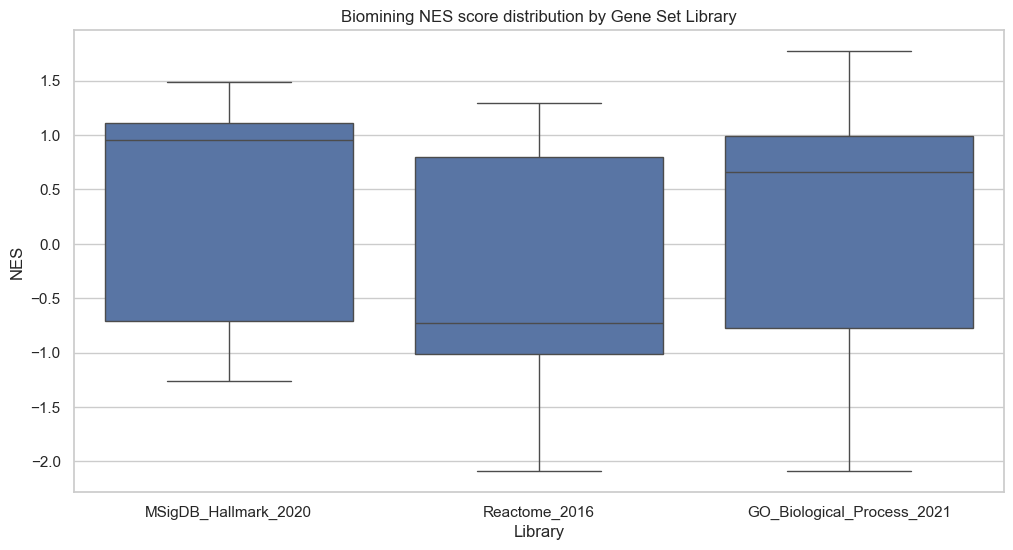

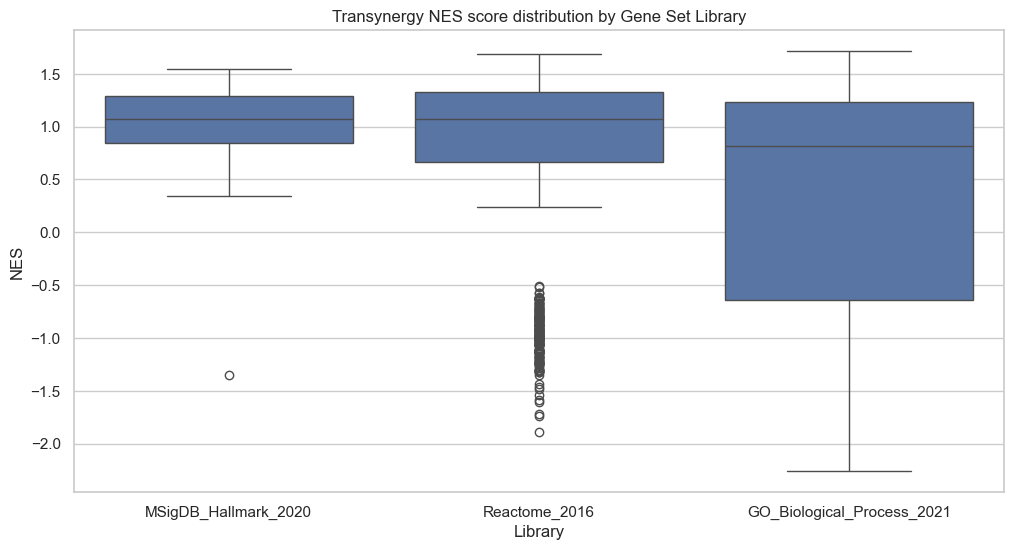

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_bio_results, x="Library", y="NES")
plt.title("Biomining NES score distribution by Gene Set Library")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=all_tran_results, x="Library", y="NES")
plt.title("Transynergy NES score distribution by Gene Set Library")
plt.show()

In [5]:
import re

def summarize_top_pathways(df, paper, top_n=5):
    for lib in libraries:
        subset = df[(df.Library == lib)]
        if subset.empty:
            continue
        
        # Filter out rows where "Lead_genes" contains "PIK" and RAS family members, were being overrepresented
        subset = subset[~subset['Lead_genes'].str.contains(r'\bPIK\w*\b|\b\w*RAS\w*\b', flags=re.IGNORECASE, regex=True)]
        
        if paper == "Biomining":
            print(f"\nTop {top_n} reliable pathways for {paper} {lib}:")
        else:
            print(f"\nTop {top_n} reliable pathways for {paper} {lib}:")
        
        # Display top N pathways sorted by q-value
        display(subset.sort_values("FDR q-val", ascending=True).head(top_n)[
            ["Term", "NES", "NOM p-val", "FDR q-val", "Lead_genes"]
        ])


summarize_top_pathways(all_bio_results, "Biomining")
summarize_top_pathways(all_tran_results, "Transynergy")


Top 5 reliable pathways for Biomining MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
2,Mitotic Spindle,1.434712,0.065997,0.138226,TOP2A;ABL1
1,G2-M Checkpoint,1.459822,0.031397,0.159633,TOP2A;ABL1
3,Estrogen Response Late,1.360246,0.061224,0.178593,TOP2A;RET
0,Pperoxisome,1.490009,0.026588,0.256881,TOP2A;NR1I2
13,Protein Secretion,1.043468,0.482979,0.591108,EGFR



Top 5 reliable pathways for Biomining Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
53,Formation of tubulin folding intermediates by ...,-1.349951,0.057803,0.281827,TUBB1
54,Prefoldin mediated transfer of substrate to C...,-1.349951,0.057803,0.281827,TUBB1
55,Cooperation of Prefoldin and TriC/CCT in acti...,-1.349951,0.057803,0.281827,TUBB1
56,Post-chaperonin tubulin folding pathway Homo s...,-1.349951,0.057803,0.281827,TUBB1
219,Regulation of TP53 Activity Homo sapiens R-HSA...,-0.724553,0.901544,0.924766,TP53



Top 5 reliable pathways for Biomining GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
278,regulation of kinase activity (GO:0043549),1.711114,0.009456,0.075326,FLT1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
279,positive regulation of kinase activity (GO:003...,1.711114,0.009456,0.075326,FLT1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
280,positive regulation of transferase activity (G...,1.711114,0.009456,0.075326,FLT1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
282,"regulation of transcription, DNA-templated (GO...",1.651971,0.01199,0.105855,NR1I2;ABL1;RET;EGFR;KIT
275,peptidyl-tyrosine phosphorylation (GO:0018108),1.724573,0.009456,0.110126,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R



Top 5 reliable pathways for Transynergy MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Estrogen Response Early,1.576602,0.005181,0.203804,EGR3;AR
1,Apical Junction,1.451698,0.075284,0.338768,AKT2;PTEN;CDK8
7,Estrogen Response Late,1.21258,0.21815,0.628106,EGR3
10,Bile Acid Metabolism,1.178274,0.26643,0.649343,AR
4,PI3K/AKT/mTOR Signaling,1.260904,0.208633,0.664855,PTEN;AKT1



Top 5 reliable pathways for Transynergy Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
56,Signaling by ERBB4 Homo sapiens R-HSA-1236394,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1
58,Signaling by FGFR2 Homo sapiens R-HSA-5654738,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1
57,Downstream signaling of activated FGFR1 Homo s...,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1
55,Downstream signal transduction Homo sapiens R-...,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1
54,Signaling by FGFR1 Homo sapiens R-HSA-5654736,1.595302,0.02375,0.128118,DUSP7;AKT2;PTEN;AKT1



Top 5 reliable pathways for Transynergy GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
585,positive regulation of protein metabolic proce...,1.45531,0.028814,0.212889,WNT7A;AKT1
584,regulation of cellular protein metabolic proce...,1.45531,0.028814,0.212889,WNT7A;AKT1
583,phosphatidylinositol 3-kinase signaling (GO:00...,1.457637,0.029126,0.214969,PTEN;AKT1
582,regulation of plasma membrane bounded cell pro...,1.457637,0.029126,0.214969,PTEN;AKT1
581,protein kinase B signaling (GO:0043491),1.457637,0.029126,0.214969,PTEN;AKT1
